#  Introduction

This notebook analyzes bank customer churn dataset to understand why customers leave and build a model to predict churn. Churn, when customers stop using the bank’s services, is a critical issue affecting revenue and growth.

Columns Description:

* Customer ID: A unique identifier for each customer
* Surname: The customer's surname or last name
* Credit Score: A numerical value representing the customer's credit score
* Geography: The country where the customer resides (France, Spain or Germany)
* Gender: The customer's gender (Male or Female)
* Age: The customer's age.
* Tenure: The number of years the customer has been with the bank
* Balance: The customer's account balance
* NumOfProducts: The number of bank products the customer uses (e.g., savings * account, credit card)
* HasCrCard: Whether the customer has a credit card (1 = yes, 0 = no)
* IsActiveMember: Whether the customer is an active member (1 = yes, 0 = no)
* EstimatedSalary: The estimated salary of the customer
* Exited: Whether the customer has churned (1 = yes, 0 = no)

By studying customer data, we aim to identify high-risk groups and create a predictive model to help the bank reduce churn.

#Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Data preprocessing
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

# Machine Learning models
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import roc_auc_score, roc_curve

# Set visualization style
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)

# Data Loading and Basic Exploration

In [ ]:
train_data = pd.read_csv("https://raw.githubusercontent.com/SalehAli2/Datasets/main/train.csv")
test_data = pd.read_csv("https://raw.githubusercontent.com/SalehAli2/Datasets/main/test.csv")

In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165034 entries, 0 to 165033
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   id               165034 non-null  int64  
 1   CustomerId       165034 non-null  int64  
 2   Surname          165034 non-null  object 
 3   CreditScore      165034 non-null  int64  
 4   Geography        165034 non-null  object 
 5   Gender           165034 non-null  object 
 6   Age              165034 non-null  float64
 7   Tenure           165034 non-null  int64  
 8   Balance          165034 non-null  float64
 9   NumOfProducts    165034 non-null  int64  
 10  HasCrCard        165034 non-null  float64
 11  IsActiveMember   165034 non-null  float64
 12  EstimatedSalary  165034 non-null  float64
 13  Exited           165034 non-null  int64  
dtypes: float64(5), int64(6), object(3)
memory usage: 17.6+ MB


In [ ]:
train_data.head()

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,15674932,Okwudilichukwu,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,1,15749177,Okwudiliolisa,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,2,15694510,Hsueh,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,3,15741417,Kao,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,4,15766172,Chiemenam,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0


In [ ]:
train_data.describe()

,id,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,165034.0000,1.650340e+05,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000
mean,82516.5000,1.569201e+07,656.454373,38.125888,5.020353,55478.086689,1.554455,0.753954,0.497770,112574.822734,0.211599
std,47641.3565,7.139782e+04,80.103340,8.867205,2.806159,62817.663278,0.547154,0.430707,0.499997,50292.865585,0.408443
min,0.0000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,11.580000,0.000000
25%,41258.2500,1.563314e+07,597.000000,32.000000,3.000000,0.000000,1.000000,1.000000,0.000000,74637.570000,0.000000
50%,82516.5000,1.569017e+07,659.000000,37.000000,5.000000,0.000000,2.000000,1.000000,0.000000,117948.000000,0.000000
75%,123774.7500,1.575682e+07,710.000000,42.000000,7.000000,119939.517500,2.000000,1.000000,1.000000,155152.467500,0.000000
max,165033.0000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.000000,1.000000,199992.480000,1.000000


Insights from the summary stats:
*   There is potential outliers in Age, Balance, and EstimatedSalary
*   The churn rate is 21%
*   IsActiveMember rate is 50% while the churn rate is 21%, there will be a further exploring to the relationship between those columns
*   Most customers age falls between 32-44




#Data Cleaning

In [ ]:
data_staging = train_data.copy()

Checking for null values

In [ ]:
print('Missing Values:\n', data_staging.isnull().sum())

Missing Values:
 id                 0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64


Now, moving on to duplicates

In [ ]:
print('Duplicates:', data_staging.duplicated().sum())

Duplicates: 0


Let's move to checking outliers

<ipython-input-14-567cada21da1>:23: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axes[0].legend()


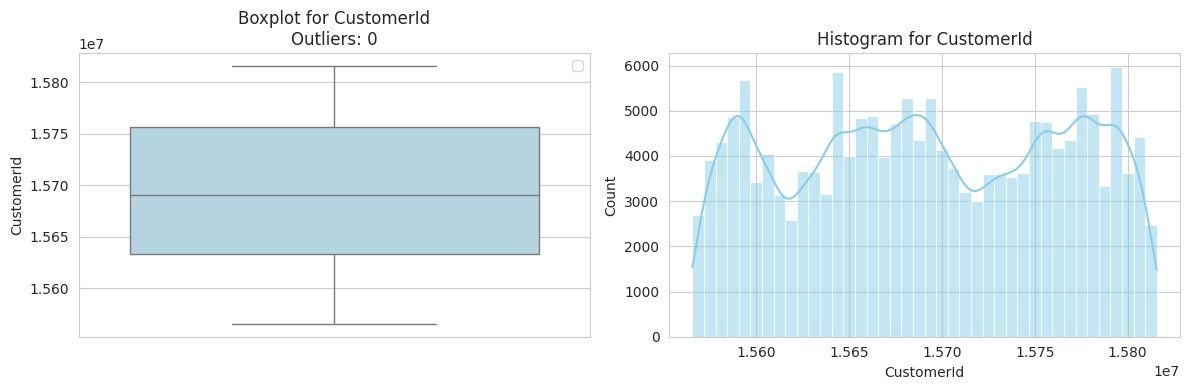

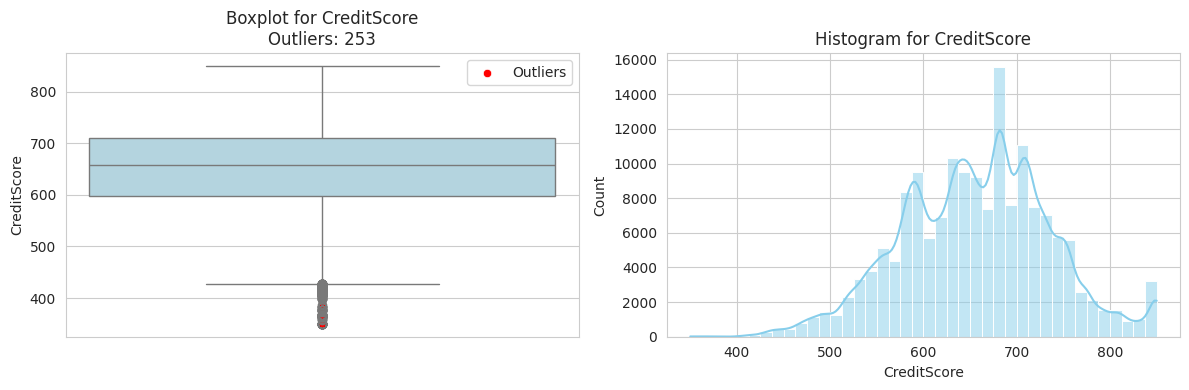

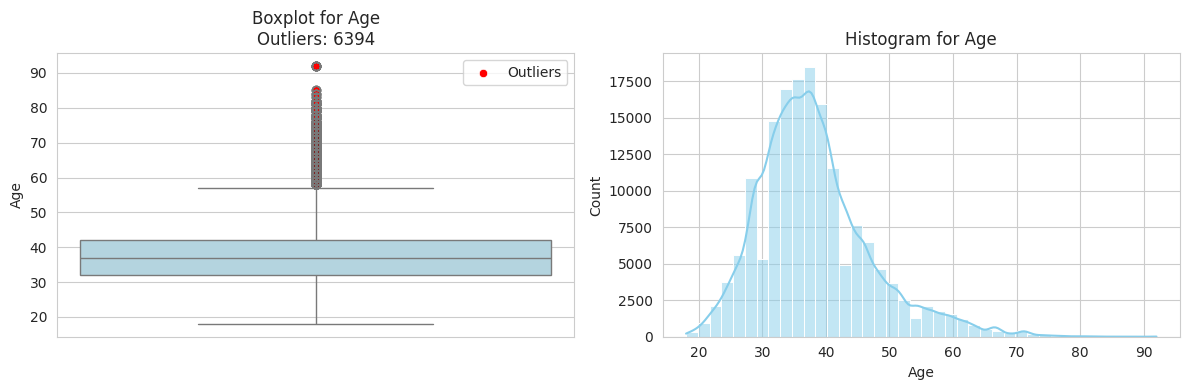

<ipython-input-14-567cada21da1>:23: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axes[0].legend()


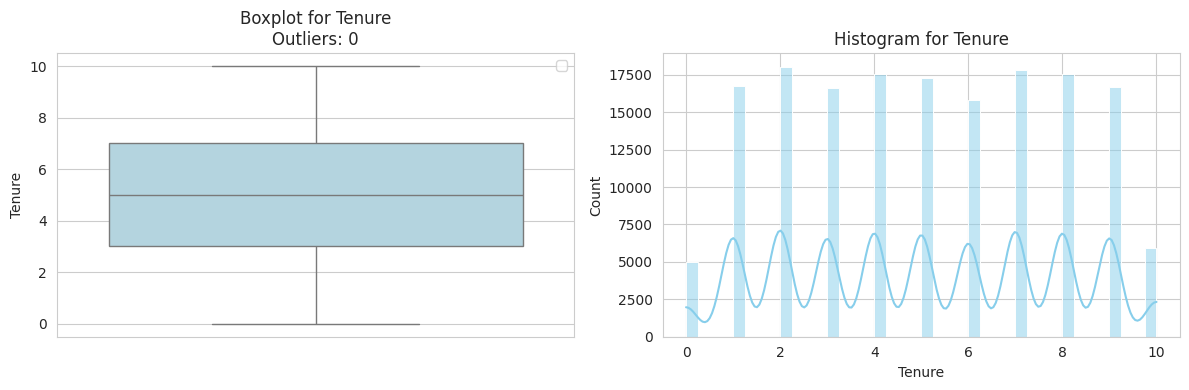

<ipython-input-14-567cada21da1>:23: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axes[0].legend()


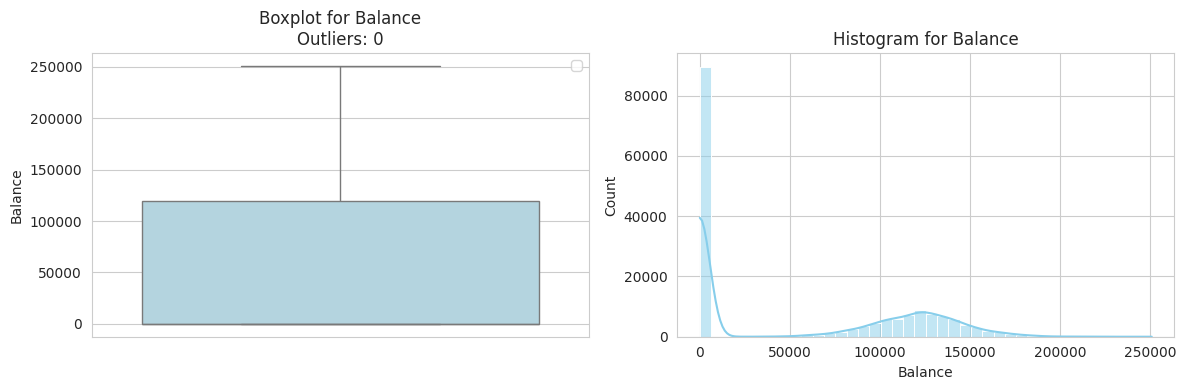

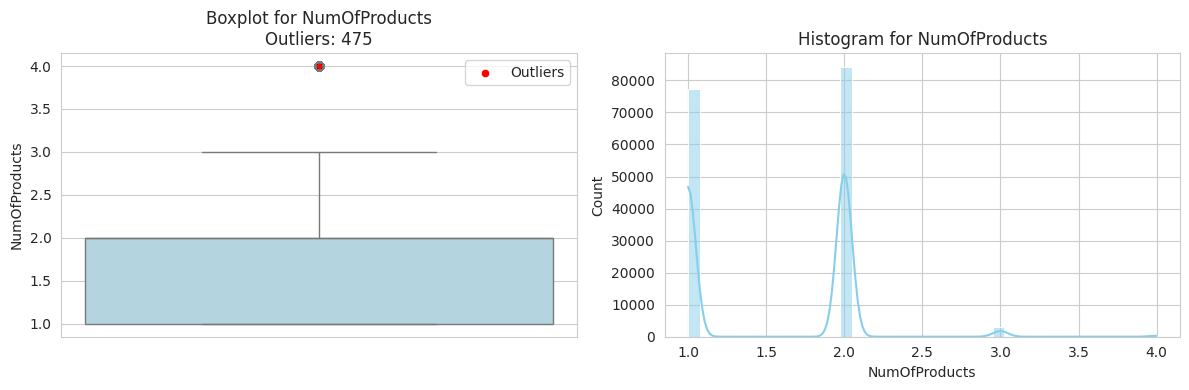

<ipython-input-14-567cada21da1>:23: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axes[0].legend()


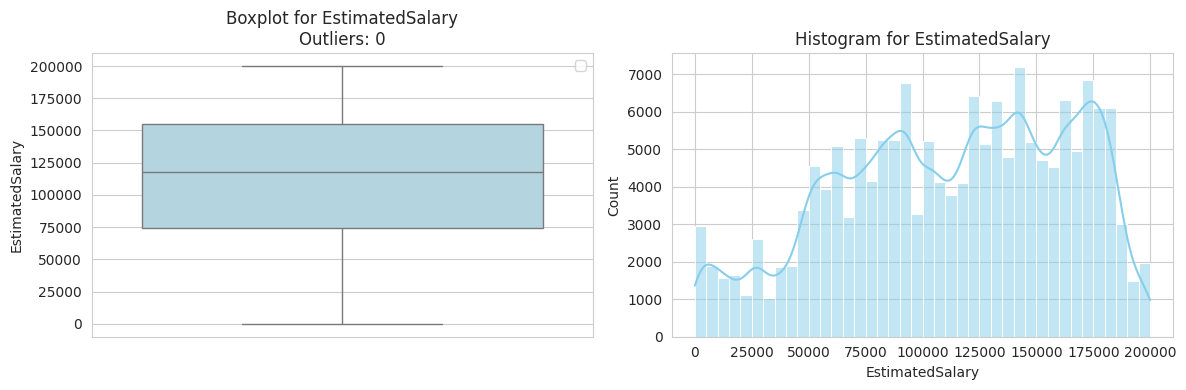

In [ ]:
# Check for outliers in numerical columns
data_numeric = data_staging.select_dtypes(include=['float64', 'int64'])
data_numeric = data_numeric.drop(['id', 'Exited', 'HasCrCard', 'IsActiveMember'], axis=1)

for col in data_numeric.columns:
    q1 = data_numeric[col].quantile(0.25)
    q3 = data_numeric[col].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr

    # Outliers
    outliers = data_numeric[(data_numeric[col] < lower_bound) | (data_numeric[col] > upper_bound)]
    no_of_outliers = len(outliers)

    # Create side-by-side plots
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))  # 1 row, 2 columns

    # Boxplot with outliers
    sns.boxplot(y=col, data=data_numeric, color='lightblue', ax=axes[0])
    sns.scatterplot(y=outliers[col], x=np.zeros(len(outliers)), color='red', ax=axes[0], label='Outliers')
    axes[0].set_title(f'Boxplot for {col}\nOutliers: {no_of_outliers}')
    axes[0].legend()
    # Histogram
    sns.histplot(data_numeric[col], kde=True, ax=axes[1], color='skyblue',bins=40)
    axes[1].set_title(f'Histogram for {col}')

    plt.tight_layout()
    plt.show()

## Outlier Analysis and Actions

1.  CreditScore

* Observation: A few values fall below the lower bound. Low credit scores are  rare, but still realistic.

* Action: Review these low values to confirm if they are valid and not data entry errors.

2. Age

* Observation: The distribution is right-skewed due to a group of older customers(outliers above the upper bound).

* Action: Investigate whether older age is associated with higher churn rates.

3. Balance

* Observation: Many customers have a balance of zero, accounting for about 54% of the data. These are not true outliers, as a zero balance is valid.

* Action: Retain zero balances, but analyze their relationship with IsActiveMember and Exited (churn).

4. NumOfProducts

* Observation: A few customers have unusually high product counts. These could  indicate premium customers rather than anomalies.

* Action: Check the exact values and determine whether they are legitimate entries or data issues.








In [ ]:
data_staging[data_staging['CreditScore'] < 400]

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
169,169,15612494,Panicucci,359,France,Female,44.0,6,128747.69,1,0.0,1.0,146955.71,0
2037,2037,15791533,Ch'ien,367,Spain,Female,35.0,6,93608.28,2,0.0,1.0,168816.73,0
5633,5633,15651052,McMillan,399,Germany,Male,28.0,2,127655.22,2,1.0,1.0,139994.68,0
14479,14479,15779947,Thomas,363,Spain,Male,28.0,6,0.00,2,0.0,0.0,100615.14,0
16735,16735,15791533,Ch'in,367,Spain,Male,42.0,3,0.00,2,1.0,1.0,168816.73,0
20078,20078,15803202,Onyekachi,350,France,Female,51.0,1,0.00,1,1.0,1.0,125823.79,0
21099,21099,15803202,Onyekachi,350,France,Male,51.0,10,0.00,1,1.0,0.0,125823.79,1
25571,25571,15803202,Onyekachi,350,France,Female,51.0,10,0.00,2,1.0,1.0,125823.79,0
26524,26524,15803202,Onyekachi,350,France,Male,25.0,9,0.00,2,1.0,0.0,125823.79,0
27917,27917,15607485,Daluchi,376,Germany,Female,29.0,4,132694.73,2,0.0,1.0,119346.88,0


Low credit scores are possible, and there are customers with low credit scores who did not churn and have remained with the bank for years while maintaining a good account balance.
Action: Keep the outliers, as they are valid and reflect realistic customer behavior.

In [ ]:
data_staging[data_staging['Age'] > 62].head(20)

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
12,12,15717962,Rossi,759,Spain,Male,71.0,9,0.00,1,1.0,1.0,93081.87,0
84,84,15777797,Nnaemeka,637,Spain,Male,64.0,1,0.00,1,0.0,1.0,181490.42,0
195,195,15810390,Lombardi,636,Spain,Female,71.0,7,0.00,2,1.0,1.0,73585.18,1
247,247,15777067,Thomas,646,Germany,Female,64.0,8,160858.13,1,1.0,0.0,61936.22,1
290,290,15704954,Suffolk,431,France,Female,66.0,1,120764.08,1,0.0,1.0,117023.08,0
458,458,15634373,Onyemachukwu,611,France,Female,67.0,4,0.00,2,0.0,1.0,177747.03,0
460,460,15604020,T'ien,683,Germany,Male,64.0,3,101514.76,2,1.0,0.0,166650.32,1
601,601,15710164,P'eng,523,France,Female,73.0,7,0.00,1,0.0,0.0,130883.90,1
727,727,15597951,Rahman,614,Spain,Male,66.0,3,0.00,1,1.0,0.0,180082.70,0
772,772,15768367,Kuykendall,477,France,Male,63.0,5,111096.97,1,0.0,1.0,71179.40,1


There is no specific connection between higher ages and churning, capping it to 70 will be best approach for skeweness and modeling

In [ ]:
data_staging.loc[data_staging['Age'] > 70, 'Age'] = 70

In [ ]:
data_staging.groupby('NumOfProducts')['Exited'].sum()

,Exited
NumOfProducts,
1,26858
2,5093
3,2554
4,416


That's interesting nearly 87% of 4 products customers churn

#Checking Inconsistent Data

In [ ]:
data_staging.nunique()

,0
id,165034
CustomerId,23221
Surname,2797
CreditScore,457
Geography,3
Gender,2
Age,55
Tenure,11
Balance,30075
NumOfProducts,4


In [ ]:
data_cat = data_staging.select_dtypes(include=['object'])

In [ ]:
data_cat.nunique()

,0
Surname,2797
Geography,3
Gender,2


In [ ]:
data_cat['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [ ]:
data_cat['Geography'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

There is no inconsistant Data

Standardize Formats

In [ ]:
data_staging.dtypes

,0
id,int64
CustomerId,int64
Surname,object
CreditScore,int64
Geography,object
Gender,object
Age,float64
Tenure,int64
Balance,float64
NumOfProducts,int64


In [ ]:
data_staging['Age'] = data_staging['Age'].astype('int64')
data_staging['HasCrCard'] = data_staging['HasCrCard'].astype('int64')
data_staging['IsActiveMember'] = data_staging['IsActiveMember'].astype('int64')
data_staging['Exited'] = data_staging['Exited'].astype('int64')

In [ ]:
data_staging.dtypes

,0
id,int64
CustomerId,int64
Surname,object
CreditScore,int64
Geography,object
Gender,object
Age,int64
Tenure,int64
Balance,float64
NumOfProducts,int64


In [ ]:
data_cleaned = data_staging.drop(['id'],axis = 1)

In [ ]:
data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165034 entries, 0 to 165033
Data columns (total 13 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   CustomerId       165034 non-null  int64  
 1   Surname          165034 non-null  object 
 2   CreditScore      165034 non-null  int64  
 3   Geography        165034 non-null  object 
 4   Gender           165034 non-null  object 
 5   Age              165034 non-null  int64  
 6   Tenure           165034 non-null  int64  
 7   Balance          165034 non-null  float64
 8   NumOfProducts    165034 non-null  int64  
 9   HasCrCard        165034 non-null  int64  
 10  IsActiveMember   165034 non-null  int64  
 11  EstimatedSalary  165034 non-null  float64
 12  Exited           165034 non-null  int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 16.4+ MB


#EDA

Checking age distribution after cleaning and capping outliers to 70

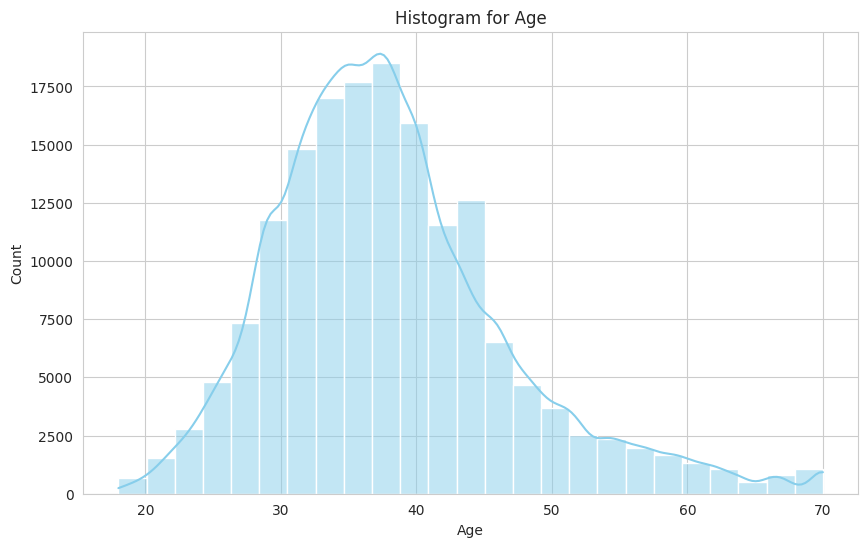

In [ ]:
sns.histplot(data_cleaned['Age'], kde=True, color='skyblue', bins = 25)
plt.title('Histogram for Age')
plt.show()

We visualize feature distributions and analyze relationships with the target variable Exited.

**Credit Score**

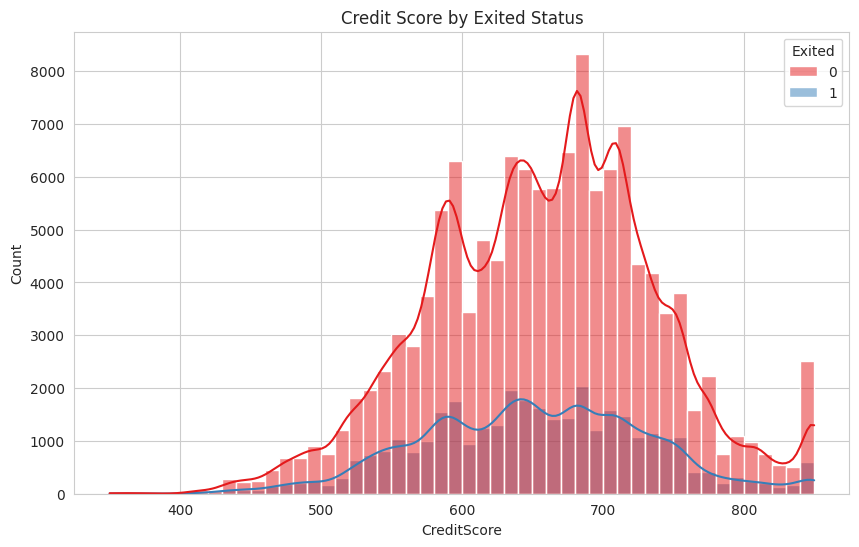

In [ ]:
sns.histplot(data=data_cleaned, x='CreditScore', hue='Exited', kde=True, palette='Set1', bins=50)
plt.title('Credit Score by Exited Status')
plt.show()

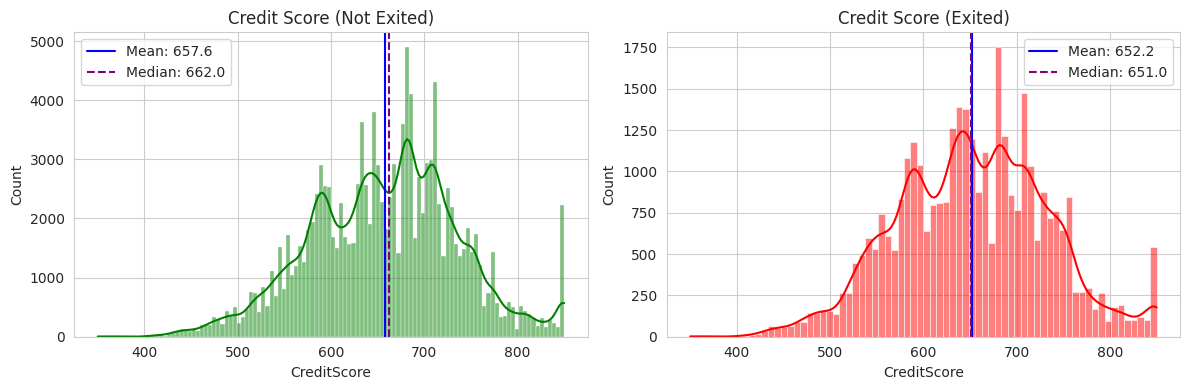

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(12, 4))

# Not Exited
data0 = data_cleaned[data_cleaned['Exited'] == 0]['CreditScore']
sns.histplot(data=data0, kde=True, color='green', ax=ax[0])
ax[0].axvline(data0.mean(), color='blue', linestyle='-', label=f'Mean: {data0.mean():.1f}')
ax[0].axvline(data0.median(), color='purple', linestyle='--', label=f'Median: {data0.median():.1f}')
ax[0].set_title('Credit Score (Not Exited)')
ax[0].legend()

# Exited
data1 = data_cleaned[data_cleaned['Exited'] == 1]['CreditScore']
sns.histplot(data=data1, kde=True, color='red', ax=ax[1])
ax[1].axvline(data1.mean(), color='blue', linestyle='-', label=f'Mean: {data1.mean():.1f}')
ax[1].axvline(data1.median(), color='purple', linestyle='--', label=f'Median: {data1.median():.1f}')
ax[1].set_title('Credit Score (Exited)')
ax[1].legend()

plt.tight_layout()
plt.show()


In [ ]:
data_cleaned['CreditScoreStatues'] = pd.cut(data_cleaned['CreditScore'], labels=['Poor', 'Fair', 'Good', 'Very Good', 'Exceptional'] , bins=[300, 580, 670, 740, 800, 850])

In [ ]:
churn_rate_by_credit = data_cleaned.groupby('CreditScoreStatues')['Exited'].sum()

<ipython-input-36-92d40a3e9e28>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  churn_rate_by_credit = data_cleaned.groupby('CreditScoreStatues')['Exited'].sum()


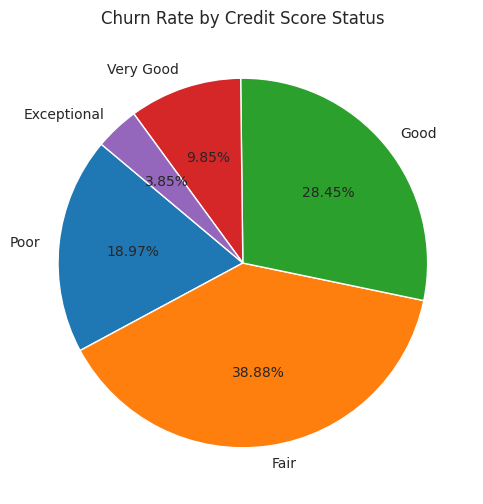

In [ ]:
plt.pie(churn_rate_by_credit, labels=churn_rate_by_credit.index, autopct='%1.2f%%', startangle=140)
plt.title('Churn Rate by Credit Score Status')
plt.show()

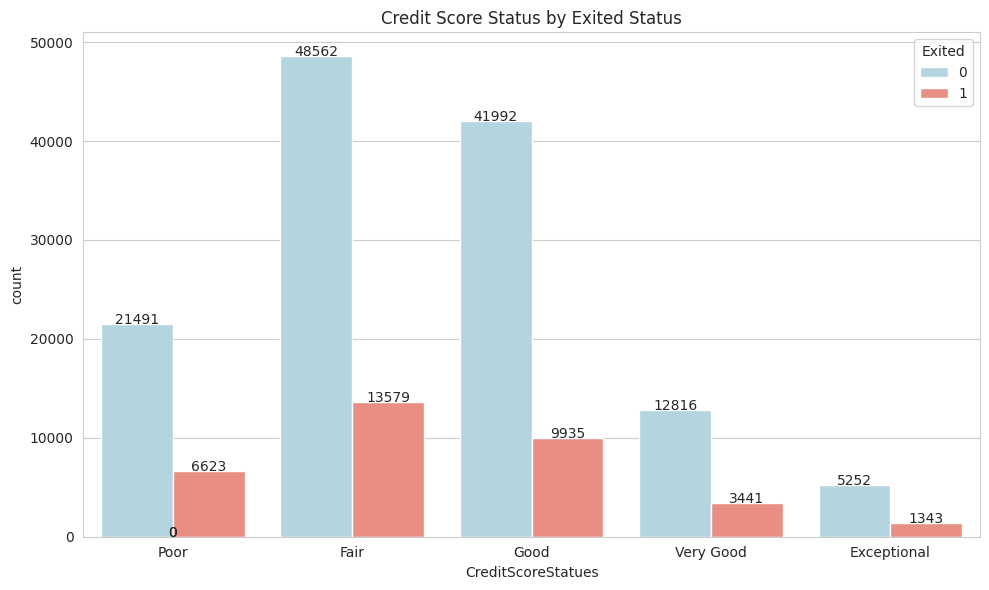

In [ ]:
ax = sns.countplot(x='CreditScoreStatues', hue='Exited', data=data_cleaned, palette=['lightblue', 'salmon'])
plt.title('Credit Score Status by Exited Status')

for p in ax.patches:
    count = int(p.get_height())
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.text(x, y + 1, str(count), ha='center', fontsize=10)

plt.tight_layout()
plt.show()

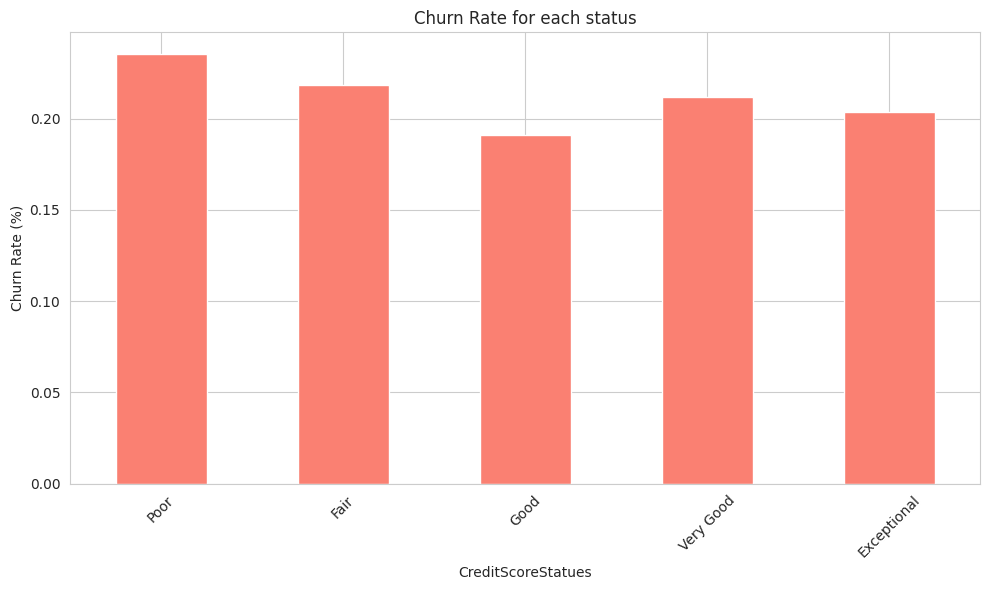

In [ ]:
churn_rate_for_each_status = data_cleaned.groupby('CreditScoreStatues',observed=False)['Exited'].mean()
churn_rate_for_each_status.plot(kind='bar', color='salmon')
plt.ylabel('Churn Rate (%)')
plt.title('Churn Rate for each status')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Insights from Credit Score:

* The Fair category contributes the most to overall churn and includes the largest number of churned customers. However, this is likely due to the large number of customers in this group, not necessarily because they are high risk.

* The Poor category has the highest churn rate within its group at 22.16%, slightly above the overall average of 21%, indicating only a mild increase in risk.

* Overall, credit score does not appear to be a strong predictor of customer churn.

**Moving on to Age**

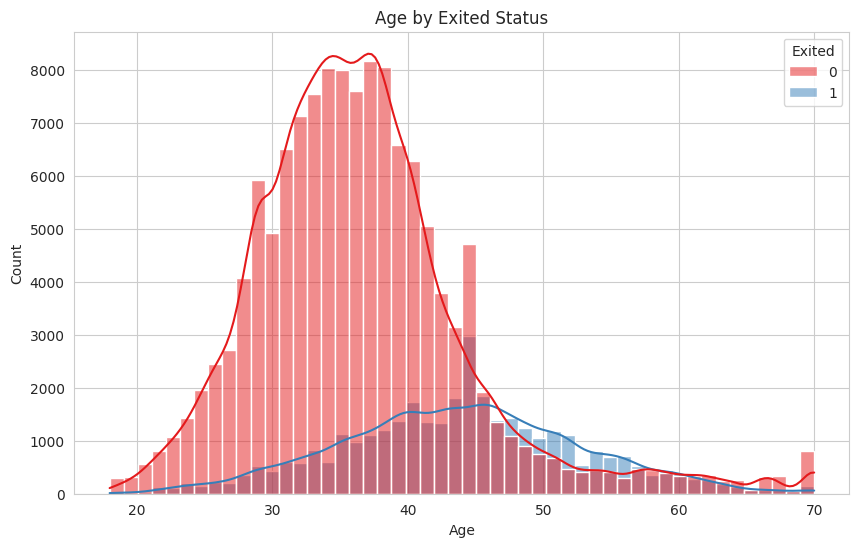

In [ ]:
sns.histplot(data=data_cleaned, x='Age', hue='Exited', kde=True, palette='Set1',bins=50)
plt.title('Age by Exited Status')
plt.show()

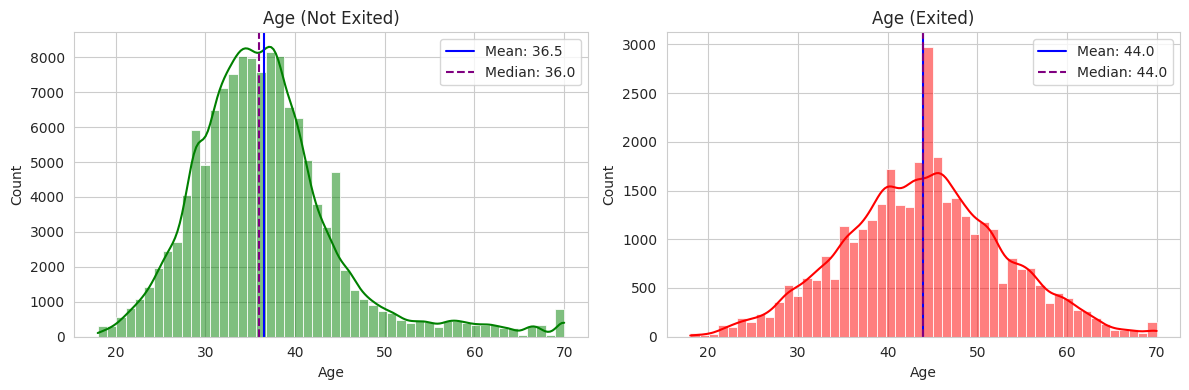

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(12, 4))

# Not Exited
data0 = data_cleaned[data_cleaned['Exited'] == 0]['Age']
sns.histplot(data=data0, kde=True, color='green', ax=ax[0],bins=50)
ax[0].axvline(data0.mean(), color='blue', linestyle='-', label=f'Mean: {data0.mean():.1f}')
ax[0].axvline(data0.median(), color='purple', linestyle='--', label=f'Median: {data0.median():.1f}')
ax[0].set_title('Age (Not Exited)')
ax[0].legend()

# Exited
data1 = data_cleaned[data_cleaned['Exited'] == 1]['Age']
sns.histplot(data=data1, kde=True, color='red', ax=ax[1],bins=50)
ax[1].axvline(data1.mean(), color='blue', linestyle='-', label=f'Mean: {data1.mean():.1f}')
ax[1].axvline(data1.median(), color='purple', linestyle='--', label=f'Median: {data1.median():.1f}')
ax[1].set_title('Age (Exited)')
ax[1].legend()

plt.tight_layout()
plt.show()


In [ ]:
data_cleaned['AgeGroup'] = pd.cut(data_cleaned['Age'],
                           bins=[18, 29, 39, 49, 59, 70],
                           labels=[
                               '18–29: Teen to Young Adult',
                               '30–39: Early Adult',
                               '40–49: Mid Adult',
                               '50–59: Late Adult',
                               '60–70: Senior'
                           ])


In [ ]:
churn_rate_by_age = data_cleaned.groupby('AgeGroup')['Exited'].sum()

<ipython-input-43-46b0720e6134>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  churn_rate_by_age = data_cleaned.groupby('AgeGroup')['Exited'].sum()


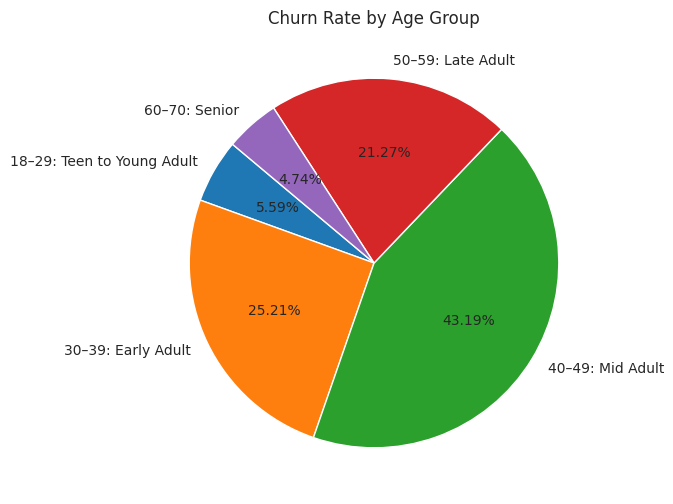

In [ ]:
plt.pie(churn_rate_by_age, labels=churn_rate_by_age.index, autopct='%1.2f%%', startangle=140)
plt.title('Churn Rate by Age Group')
plt.show()

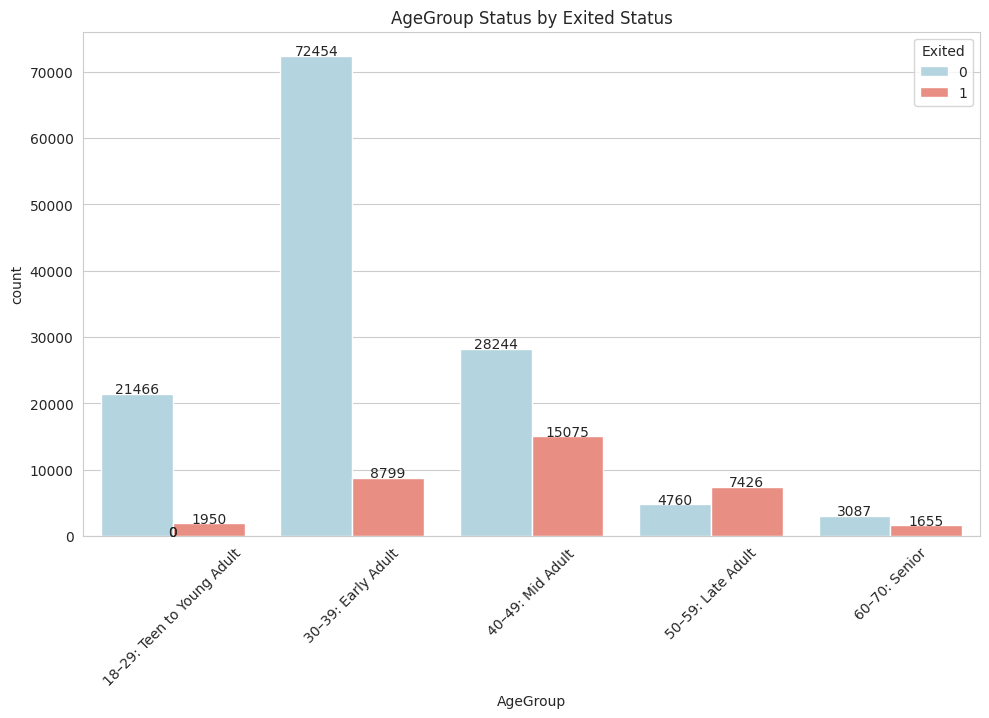

In [ ]:
ax = sns.countplot(x='AgeGroup', hue='Exited', data=data_cleaned, palette=['lightblue', 'salmon'])
plt.title('AgeGroup Status by Exited Status')

for p in ax.patches:
    count = int(p.get_height())
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.text(x, y + 1, str(count), ha='center', fontsize=10)

plt.tight_layout()
plt.xticks(rotation=45)
plt.show()

In [ ]:
churn_rate_for_each_group = data_cleaned.groupby('AgeGroup')['Exited'].mean()

<ipython-input-48-f6479f1117a4>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  churn_rate_for_each_group = data_cleaned.groupby('AgeGroup')['Exited'].mean()


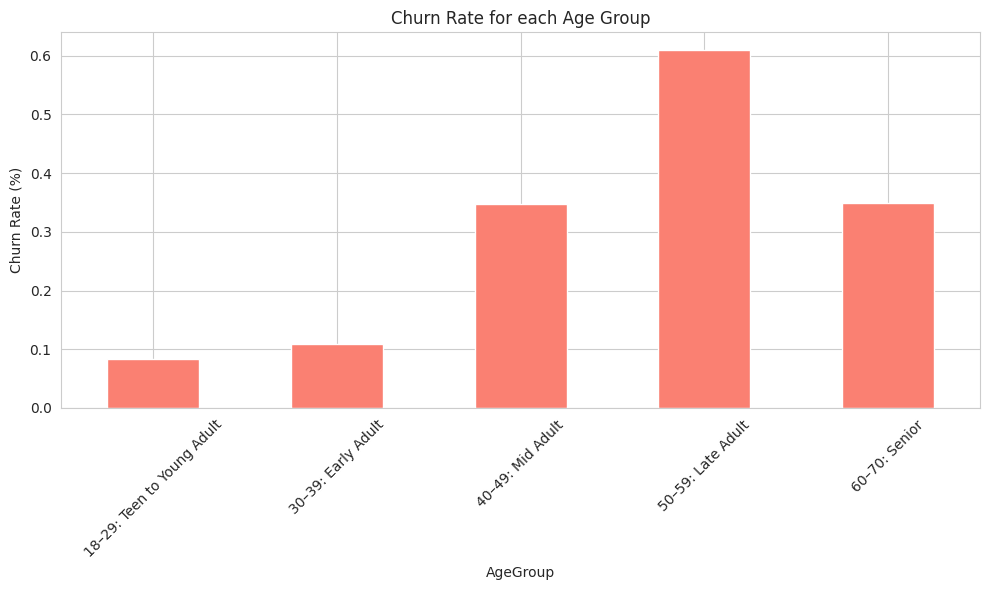

In [ ]:
churn_rate_for_each_group.plot(kind='bar', color='salmon')
plt.ylabel('Churn Rate (%)')
plt.title('Churn Rate for each Age Group')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Insights from Age:

* Customers aged 50–59 have the highest churn rate, with nearly 60% of them leaving the bank.

* The 40–49 age group is the largest contributor to overall churn, accounting for 43% of all churned customers, where churners outnumber non-churners.



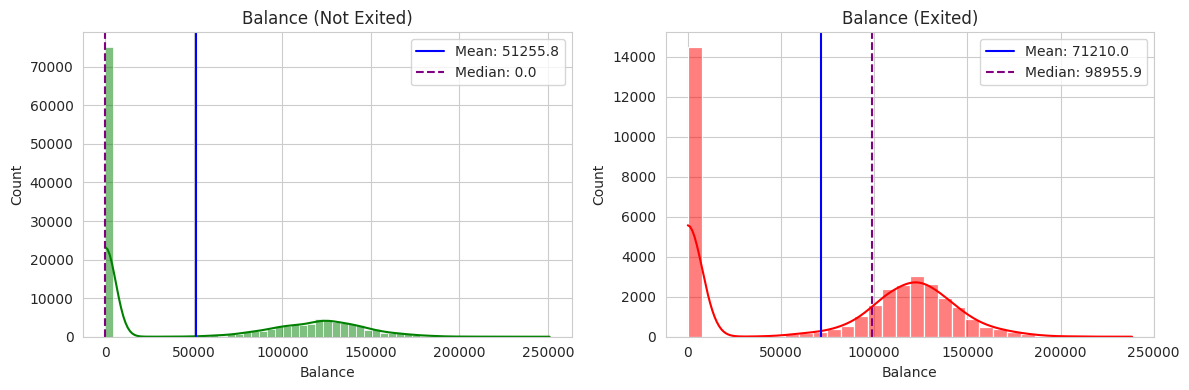

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(12, 4))

# Not Exited
data0 = data_cleaned[data_cleaned['Exited'] == 0 ]['Balance']
sns.histplot(data=data0, kde=True, color='green', ax=ax[0])
ax[0].axvline(data0.mean(), color='blue', linestyle='-', label=f'Mean: {data0.mean():.1f}')
ax[0].axvline(data0.median(), color='purple', linestyle='--', label=f'Median: {data0.median():.1f}')
ax[0].set_title('Balance (Not Exited)')
ax[0].legend()

# Exited
data1 = data_cleaned[data_cleaned['Exited'] == 1]['Balance']
sns.histplot(data=data1, kde=True, color='red', ax=ax[1])
ax[1].axvline(data1.mean(), color='blue', linestyle='-', label=f'Mean: {data1.mean():.1f}')
ax[1].axvline(data1.median(), color='purple', linestyle='--', label=f'Median: {data1.median():.1f}')
ax[1].set_title('Balance (Exited)')
ax[1].legend()

plt.tight_layout()
plt.show()


Ivestigating Balance without Zero balances

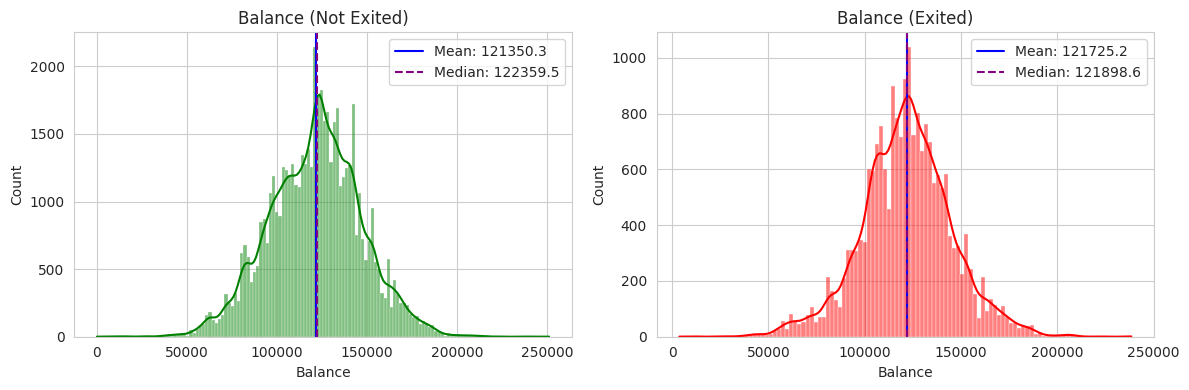

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(12, 4))

# Not Exited
data0 = data_cleaned[(data_cleaned['Exited'] == 0) & (data_cleaned['Balance'] > 0) ]['Balance']
sns.histplot(data=data0, kde=True, color='green', ax=ax[0])
ax[0].axvline(data0.mean(), color='blue', linestyle='-', label=f'Mean: {data0.mean():.1f}')
ax[0].axvline(data0.median(), color='purple', linestyle='--', label=f'Median: {data0.median():.1f}')
ax[0].set_title('Balance (Not Exited)')
ax[0].legend()

# Exited
data1 = data_cleaned[(data_cleaned['Exited'] == 1) & (data_cleaned['Balance'] > 0) ]['Balance']
sns.histplot(data=data1, kde=True, color='red', ax=ax[1])
ax[1].axvline(data1.mean(), color='blue', linestyle='-', label=f'Mean: {data1.mean():.1f}')
ax[1].axvline(data1.median(), color='purple', linestyle='--', label=f'Median: {data1.median():.1f}')
ax[1].set_title('Balance (Exited)')
ax[1].legend()

plt.tight_layout()
plt.show()




*   Without zeros, Balance doesn’t seem to drive churn much. Churners and non-churners have similar balances
*   With zeros, Churners have higher mean and median balances. This suggests customers with higher or zero balances might churn more.



In [ ]:
zero_balance_churn = data_cleaned[data_cleaned['Balance'] == 0]['Exited'].mean() * 100

In [ ]:
non_zero_balance_churn = data_cleaned[data_cleaned['Balance'] > 0]['Exited'].mean() * 100

In [ ]:
print(f"Churn Rate for Zero Balances: {zero_balance_churn:.2f}%")
print(f"Churn Rate for Non-Zero Balances: {non_zero_balance_churn:.2f}%")

Churn Rate for Zero Balances: 16.17%
Churn Rate for Non-Zero Balances: 27.10%


In [ ]:
data_cleaned['BalanceStatus'] = pd.cut(data_cleaned['Balance'],
                           bins=[-0.01, 1, 50000, 100000, 150000,data_cleaned['Balance'].max()],
                           labels=[
                               'Zero',
                               'Low',
                               'Medium',
                               'High',
                               'Very High'
                           ])

In [ ]:
churn_rate_by_balance = data_cleaned.groupby('BalanceStatus')['Exited'].sum()

<ipython-input-56-956d37645109>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  churn_rate_by_balance = data_cleaned.groupby('BalanceStatus')['Exited'].sum()


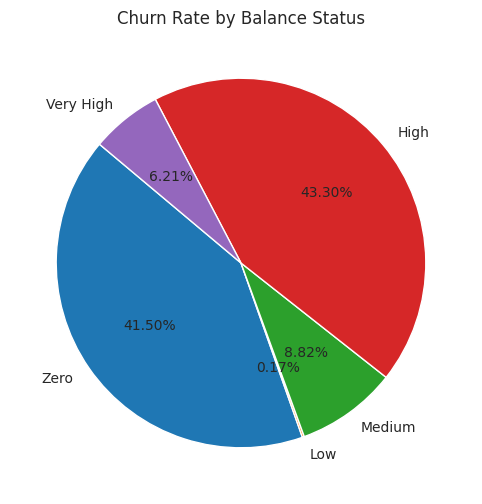

In [ ]:
plt.pie(churn_rate_by_balance, labels=churn_rate_by_balance.index, autopct='%1.2f%%', startangle=140)
plt.title('Churn Rate by Balance Status')
plt.show()

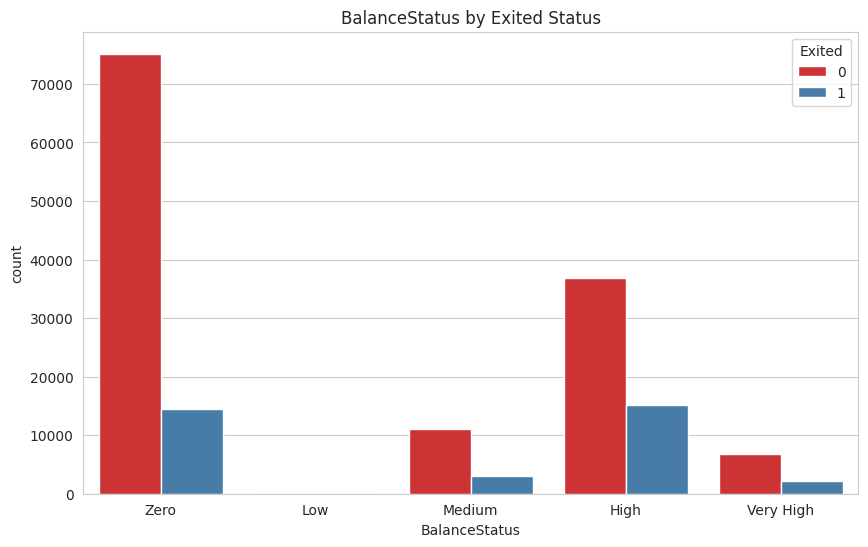

In [ ]:
sns.countplot(x='BalanceStatus', hue='Exited', data=data_cleaned, palette='Set1')
plt.title(f'BalanceStatus by Exited Status')
plt.show()

In [ ]:
churn_rate_for_each_balance = data_cleaned.groupby('BalanceStatus')['Exited'].mean()
churn_rate_for_each_balance*100

<ipython-input-59-fc199a9bebed>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  churn_rate_for_each_balance = data_cleaned.groupby('BalanceStatus')['Exited'].mean()


,Exited
BalanceStatus,
Zero,16.165447
Low,29.756098
Medium,21.658694
High,29.081956
Very High,24.169824


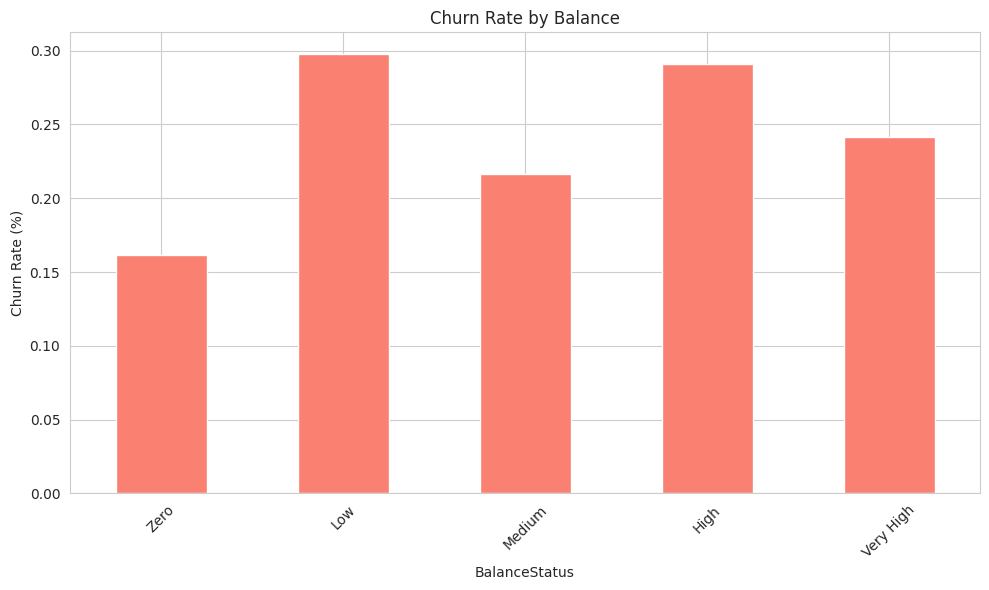

In [ ]:
churn_rate_for_each_balance.plot(kind='bar', color='salmon')
plt.ylabel('Churn Rate (%)')
plt.title('Churn Rate by Balance')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Insights from Balance:

* High balance customers contribute to 43% of all churners and churn at above-average rates. However, this is mainly due to their large group size, not necessarily high risk.

* Customers with zero balances have a low churn rate of 16%, suggesting that low-activity or inactive accounts are more likely to stay.

* The Low balance group (e.g., 1–50k) shows a high churn rate of 34.67%, indicating elevated risk. However, they represent only 0.2% of total churners because they are a small segment.

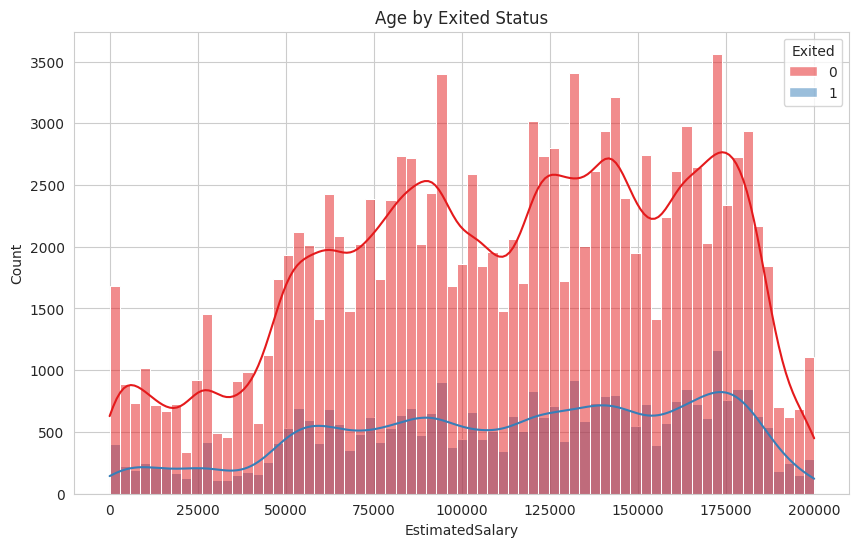

In [ ]:
sns.histplot(data=data_cleaned, x='EstimatedSalary', hue='Exited', kde=True, palette='Set1')
plt.title('Age by Exited Status')
plt.show()

Estimated Salary is not a key factor in customer churning

Moving on for categorical columns

In [ ]:
data_to_explore = data_cleaned[['Geography','Gender','NumOfProducts','HasCrCard','IsActiveMember']]

               mean                      count               
Geography    France   Germany     Spain France Germany  Spain
Exited     0.165282  0.378952  0.172176  94215   34606  36213


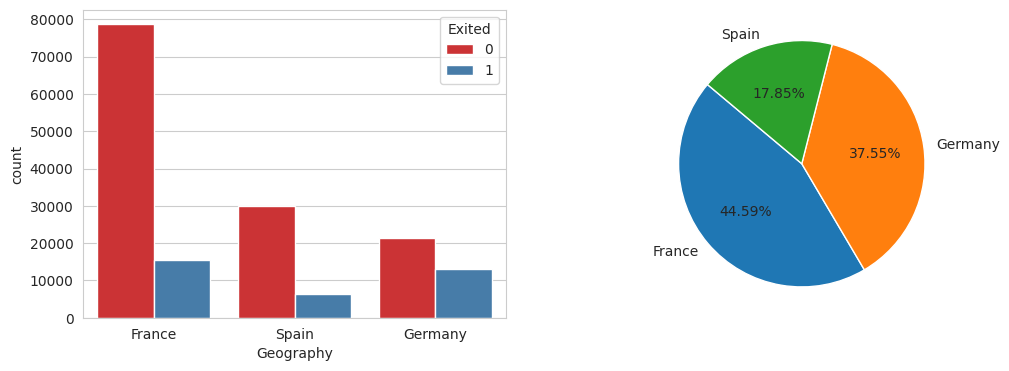

            mean            count       
Gender    Female      Male Female   Male
Exited  0.279687  0.159055  71884  93150


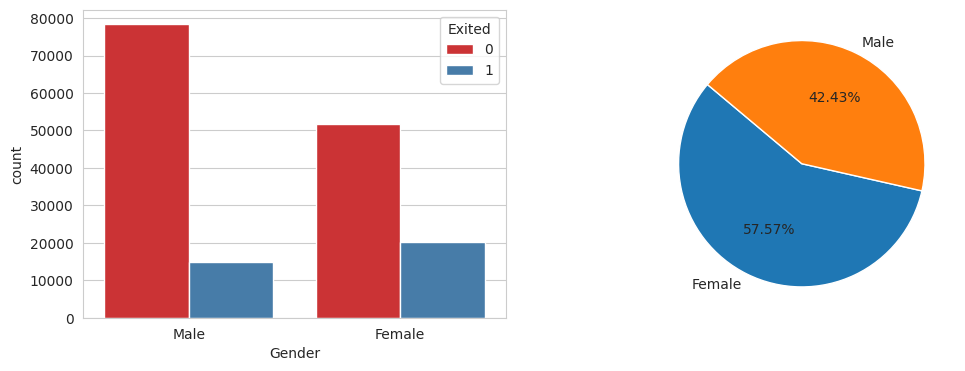

                   mean                                count                  
NumOfProducts         1         2         3         4      1      2     3    4
Exited         0.347119  0.060422  0.882516  0.875789  77374  84291  2894  475


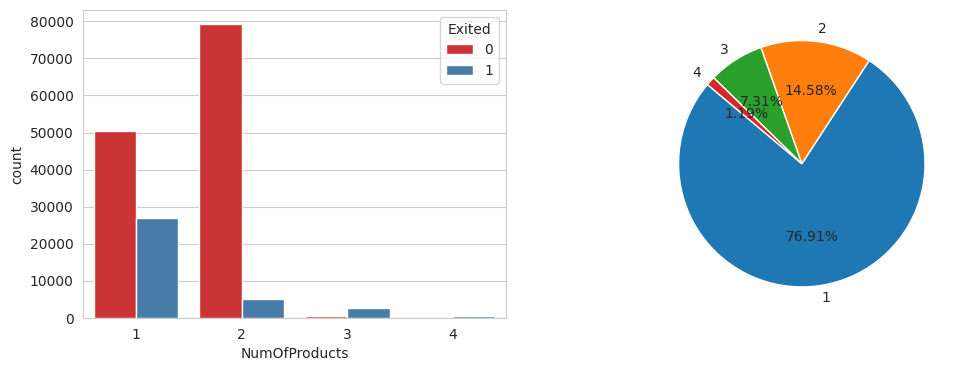

               mean            count        
HasCrCard         0         1      0       1
Exited     0.227429  0.206433  40606  124428


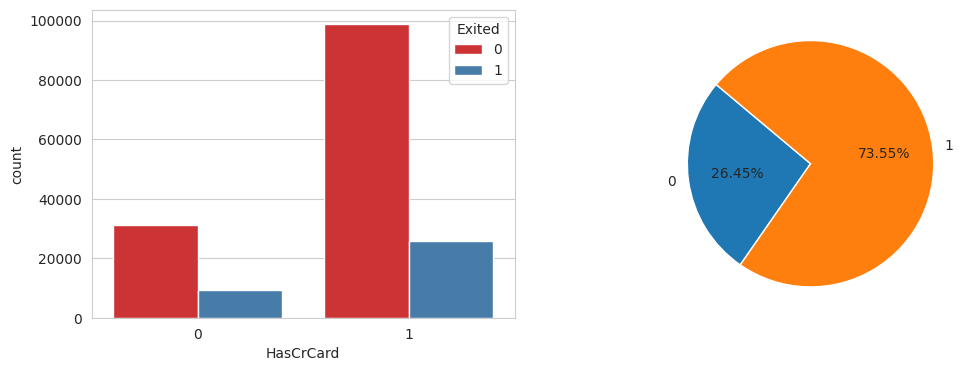

                    mean            count       
IsActiveMember         0         1      0      1
Exited          0.297086  0.125345  82885  82149


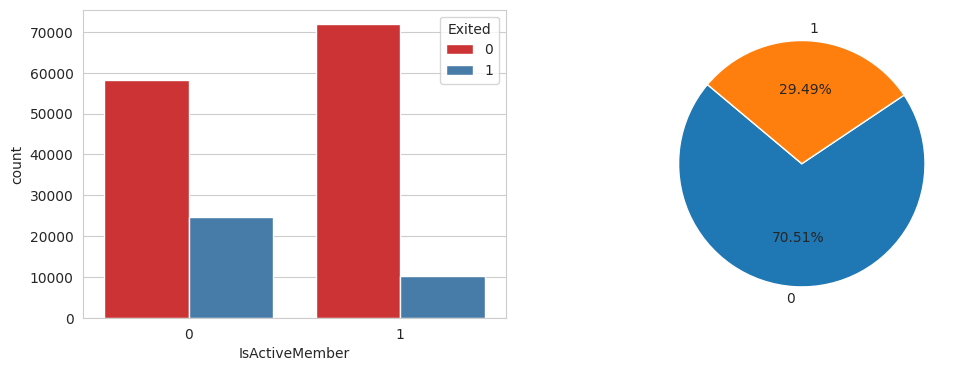

In [ ]:
for col in data_to_explore.columns:
  print(data_cleaned.pivot_table(values='Exited', columns=col, aggfunc=['mean', 'count']))
  fig, axes = plt.subplots(1, 2, figsize=(12, 4))
  sns.countplot(x=col, hue='Exited', data=data_cleaned, palette='Set1', ax = axes[0])
  axes[1].pie(data_cleaned.groupby(col)['Exited'].sum(), labels=data_cleaned.groupby(col)['Exited'].sum().index, autopct='%1.2f%%', startangle=140)
  plt.show()

1. Geography:

* Germany Loses Most Customers: 37% of German customers churn, and they represent 37.5% of all churners.

* France Is Stable but Large: Although about 50% of all customers are from France and their churn rate is low at 16%, they still account for 44% of all churners due to their large population.

2. Gender:

* Females Churn More: Females make up 57.5% of churners, despite being fewer in number than males.

Only 16% of male customers churn, indicating lower risk.

3. NumOfProducts:

* Customers with 3 or 4 products show very high churn rates, but these groups are very small.

* 1 Product = High Risk: Customers with only 1 product have a 34.7% churn rate and make up 76.9% of all churners, driven by their large group size.

4. HasCrCard:

* Most churners have a credit card, but this is likely due to the overall high percentage of customers with cards, not because it increases churn risk.

5. IsActiveMember:

* Inactivity is a strong churn indicator: 29.7% of inactive members churn, highlighting a significant risk factor.

In [ ]:
print(data_cleaned.groupby(['AgeGroup'])['Exited'].sum())
data_cleaned.groupby(['AgeGroup','NumOfProducts'])['Exited'].sum()


AgeGroup
18–29: Teen to Young Adult     1950
30–39: Early Adult             8799
40–49: Mid Adult              15075
50–59: Late Adult              7426
60–70: Senior                  1655
Name: Exited, dtype: int64


<ipython-input-65-beda877669f1>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(data_cleaned.groupby(['AgeGroup'])['Exited'].sum())
<ipython-input-65-beda877669f1>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  data_cleaned.groupby(['AgeGroup','NumOfProducts'])['Exited'].sum()


AgeGroup                    NumOfProducts
18–29: Teen to Young Adult  1                 1368
                            2                  416
                            3                  145
                            4                   21
30–39: Early Adult          1                 6600
                            2                 1481
                            3                  633
                            4                   85
40–49: Mid Adult            1                11744
                            2                 2084
                            3                 1057
                            4                  190
50–59: Late Adult           1                 5873
                            2                  874
                            3                  585
                            4                   94
60–70: Senior               1                 1259
                            2                  237
                            3                  133
                            4                   26
Name: Exited, dtype: int64

* In the 40–49 age group, customers with only one product contribute the highest number of churners, likely due to a high churn rate. Similarly.
* in the 30–39 age group (Early Adult), customers with one product are the second-highest churners, indicating that both age and having just one product increase the risk of churn.

In [ ]:
data_cleaned[data_cleaned['Exited']==1].groupby(['HasCrCard','IsActiveMember'])['Exited'].count()

HasCrCard  IsActiveMember
0          0                  6079
           1                  3156
1          0                 18545
           1                  7141
Name: Exited, dtype: int64

Some customers who leave are active and have a credit card, but they churn less often (14.28% for active vs. 26.85% for inactive).

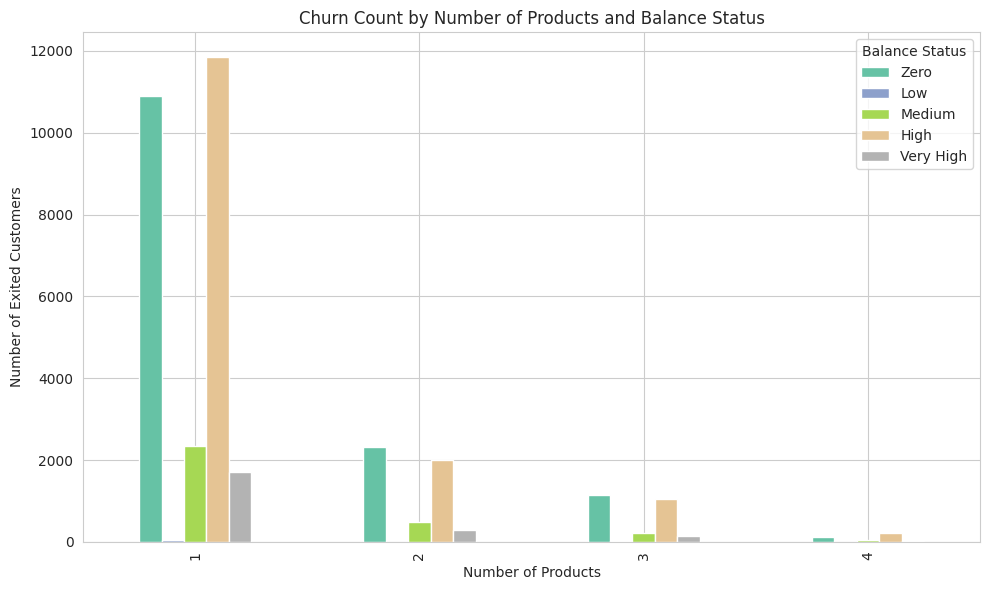

In [ ]:
data_cleaned.groupby(['NumOfProducts', 'BalanceStatus'],observed=False)['Exited'].sum().unstack().plot(
    kind='bar',
    figsize=(10, 6),
    colormap='Set2'
)
plt.title('Churn Count by Number of Products and Balance Status')
plt.ylabel('Number of Exited Customers')
plt.xlabel('Number of Products')
plt.legend(title='Balance Status')
plt.tight_layout()
plt.show()


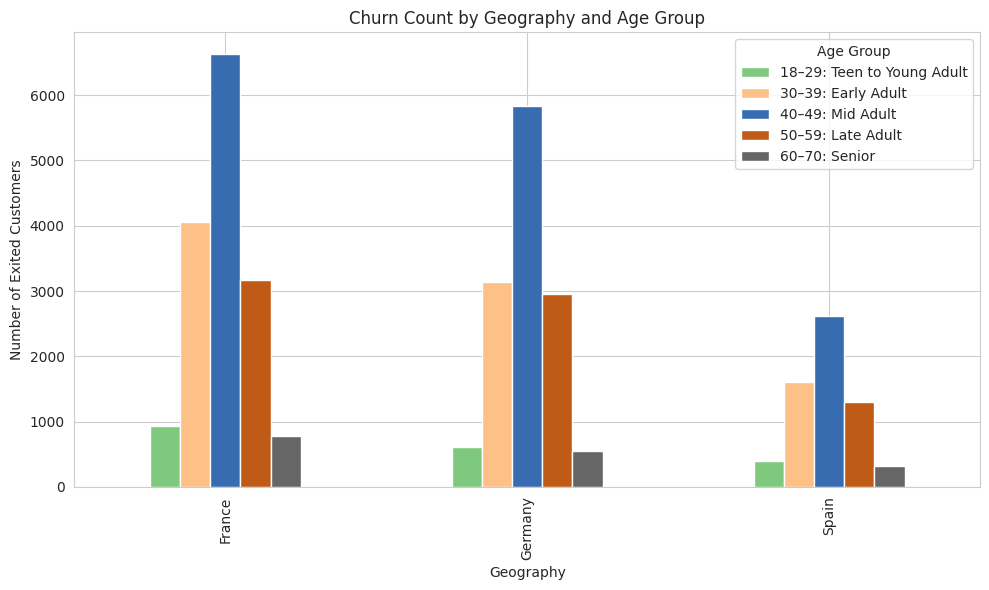

In [ ]:
data_cleaned.groupby(['Geography', 'AgeGroup'],observed=False)['Exited'].sum().unstack().plot(
    kind='bar',
    stacked=False,
    figsize=(10, 6),
    colormap='Accent'
)
plt.title('Churn Count by Geography and Age Group')
plt.ylabel('Number of Exited Customers')
plt.xlabel('Geography')
plt.legend(title='Age Group')
plt.tight_layout()
plt.show()


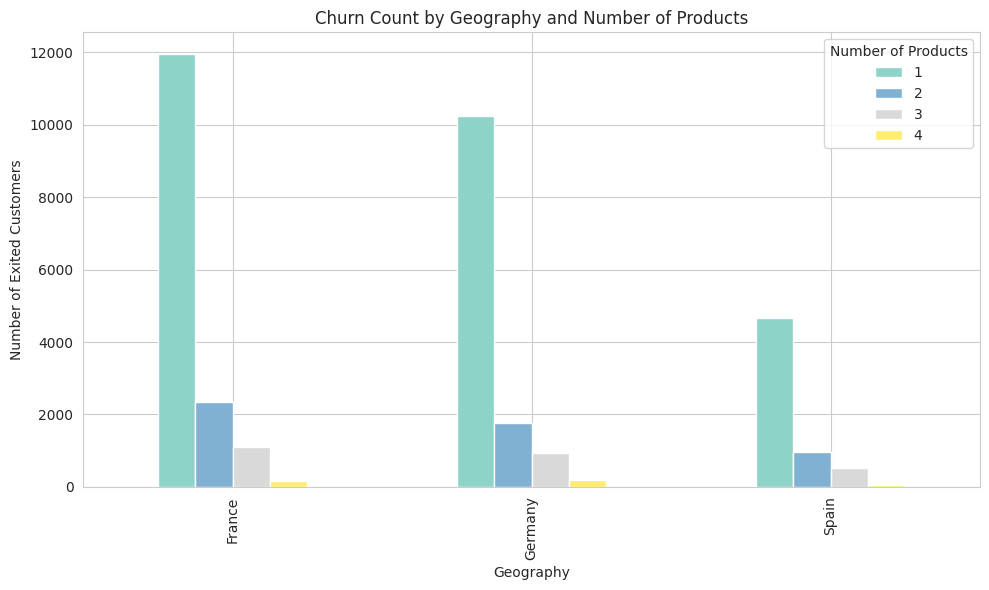

In [ ]:
data_cleaned.groupby(['Geography', 'NumOfProducts'])['Exited'].sum().unstack().plot(
    kind='bar',
    figsize=(10, 6),
    colormap='Set3'
)
plt.title('Churn Count by Geography and Number of Products')
plt.xlabel('Geography')
plt.ylabel('Number of Exited Customers')
plt.legend(title='Number of Products')
plt.tight_layout()
plt.show()


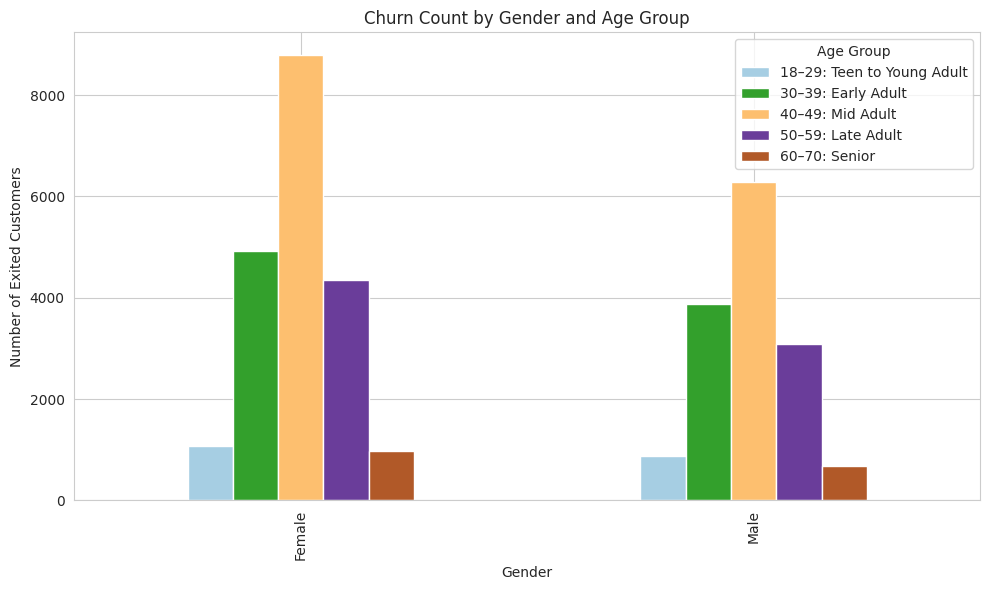

In [ ]:
data_cleaned.groupby(['Gender', 'AgeGroup'],observed=False)['Exited'].sum().unstack().plot(
    kind='bar',
    figsize=(10, 6),
    colormap='Paired'
)
plt.title('Churn Count by Gender and Age Group')
plt.xlabel('Gender')
plt.ylabel('Number of Exited Customers')
plt.legend(title='Age Group')
plt.tight_layout()
plt.show()


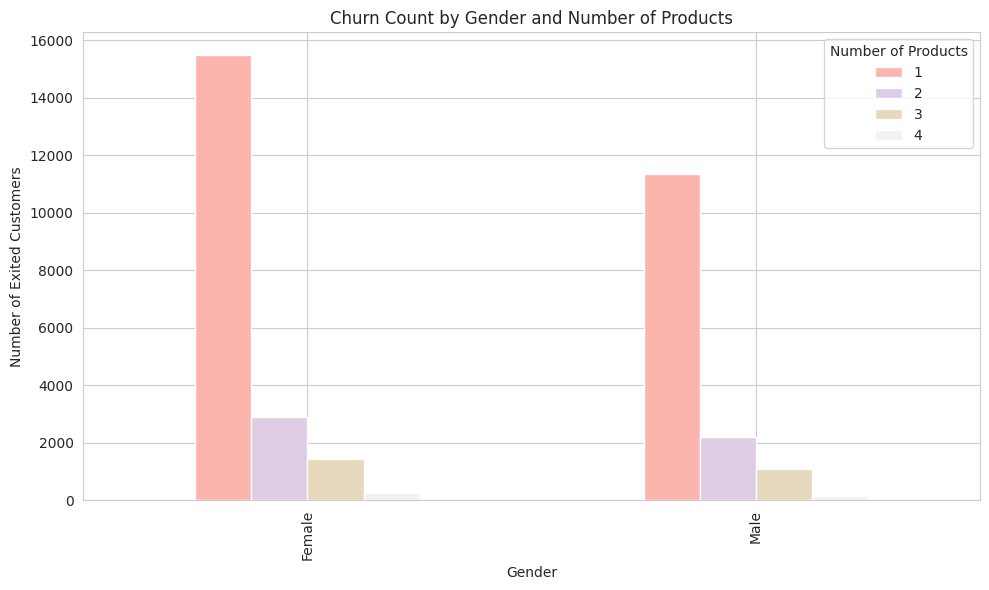

In [ ]:
data_cleaned.groupby(['Gender', 'NumOfProducts'])['Exited'].sum().unstack().plot(
    kind='bar',
    figsize=(10, 6),
    colormap='Pastel1'
)
plt.title('Churn Count by Gender and Number of Products')
plt.xlabel('Gender')
plt.ylabel('Number of Exited Customers')
plt.legend(title='Number of Products')
plt.tight_layout()
plt.show()


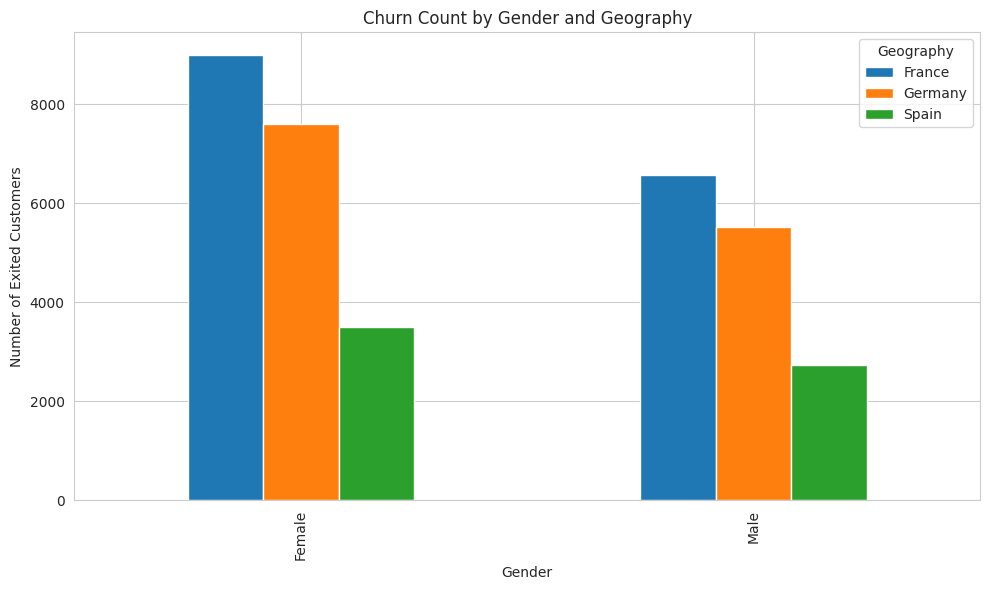

In [ ]:
data_cleaned.groupby(['Gender', 'Geography'])['Exited'].sum().unstack().plot(
    kind='bar',
    figsize=(10, 6)
)
plt.title('Churn Count by Gender and Geography')
plt.xlabel('Gender')
plt.ylabel('Number of Exited Customers')
plt.legend(title='Geography')
plt.tight_layout()
plt.show()


#Feature Engineering

In [ ]:
bank_df = data_cleaned.copy()

In [ ]:
bank_train_df = bank_df.drop(columns=['CreditScoreStatues','AgeGroup','BalanceStatus'],axis = 1)

In [ ]:
bank_train_df.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15674932,Okwudilichukwu,668,France,Male,33,3,0.00,2,1,0,181449.97,0
1,15749177,Okwudiliolisa,627,France,Male,33,1,0.00,2,1,1,49503.50,0
2,15694510,Hsueh,678,France,Male,40,10,0.00,2,1,0,184866.69,0
3,15741417,Kao,581,France,Male,34,2,148882.54,1,1,1,84560.88,0
4,15766172,Chiemenam,716,Spain,Male,33,5,0.00,2,1,1,15068.83,0


In [ ]:
def geo_gender_tr(df) :
    df['Geo_Gender'] = df['Geography'].astype('str') + '_' + df['Gender'].astype('str')
    return df

def cred_score_tr(df) :
    df['Credit_Score_Range'] = pd.cut(df['CreditScore'], bins=[0, 300, 600, 700, 800, 900], labels=['0-300', '300-600', '600-700', '700-800', '900+'])
    return df

def age_tr(df) :
    df['Age_Category'] = pd.cut(df['Age'], bins=[18, 30, 40, 50, 60, 100], labels=['18-30', '30-40', '40-50', '50-60', '60+'],include_lowest = True)
    return df


def is_young(df):
    df['IS_Young'] = pd.cut(df['Age'], bins = [18, 35, 100], labels = [0, 1 ], include_lowest = True)
    return df

def gen_active_tr(df) :
    df['IsActive_Gender'] = df['IsActiveMember'].astype('str') + '_' + df['Gender'].astype('str')
    return df

def gen_no_tr(df) :
    df['No_Gender'] = df['NumOfProducts'].astype('str') + '_' + df['Gender'].astype('str')
    return df

def acc_sal_tr(df):
    df['Balance_Salary_Ratio'] = df['Balance'] / df['EstimatedSalary']
    return df

def age_sal_tr(df):
    df['Balance_Age_Ratio'] = df['Balance'] / df['Age']
    return df

def age_acc_tr(df):
    df['Salary_Age_ratio'] = df['EstimatedSalary'] / df['Age']
    return df

def tp_gender_tr(df) :
    df['Tp_Gender'] = df['NumOfProducts'].astype('str') + df['Gender'].astype('str')
    return df

def meme(data):
    data['Mem__no__Products'] = data['NumOfProducts'] * data['IsActiveMember']
    return data

def credit_tenure(data):
    data['Credit_per_Tenure'] = data['Tenure'] / data['CreditScore']
    return data
def salary_tenure(data):
    data['Tenure_per_Salary'] = data['Tenure'] / data['EstimatedSalary']
    return data

In [ ]:
le = LabelEncoder()

In [ ]:
bank_train_df = geo_gender_tr(bank_train_df)
bank_train_df = cred_score_tr(bank_train_df)
bank_train_df = age_tr(bank_train_df)
bank_train_df = is_young(bank_train_df)
bank_train_df = gen_active_tr(bank_train_df)
bank_train_df = gen_no_tr(bank_train_df)
bank_train_df = acc_sal_tr(bank_train_df)
bank_train_df = age_sal_tr(bank_train_df)
bank_train_df = age_acc_tr(bank_train_df)
bank_train_df = tp_gender_tr(bank_train_df)
bank_train_df = meme(bank_train_df)
bank_train_df = credit_tenure(bank_train_df)
bank_train_df = salary_tenure(bank_train_df)

bank_train_df['Geo_Gender'] = le.fit_transform(bank_train_df['Geo_Gender'])
bank_train_df['Credit_Score_Range'] = le.fit_transform(bank_train_df['Credit_Score_Range'])
bank_train_df['Age_Category'] = le.fit_transform(bank_train_df['Age_Category'])
bank_train_df['IsActive_Gender'] = le.fit_transform(bank_train_df['IsActive_Gender'])
bank_train_df['No_Gender'] = le.fit_transform(bank_train_df['No_Gender'])
bank_train_df['Tp_Gender'] = le.fit_transform(bank_train_df['Tp_Gender'])
bank_train_df['Gender'] = le.fit_transform(bank_train_df['Gender'])
bank_train_df['Geography'] = le.fit_transform(bank_train_df['Geography'])
bank_train_df['IS_Young'] = le.fit_transform(bank_train_df['IS_Young'])

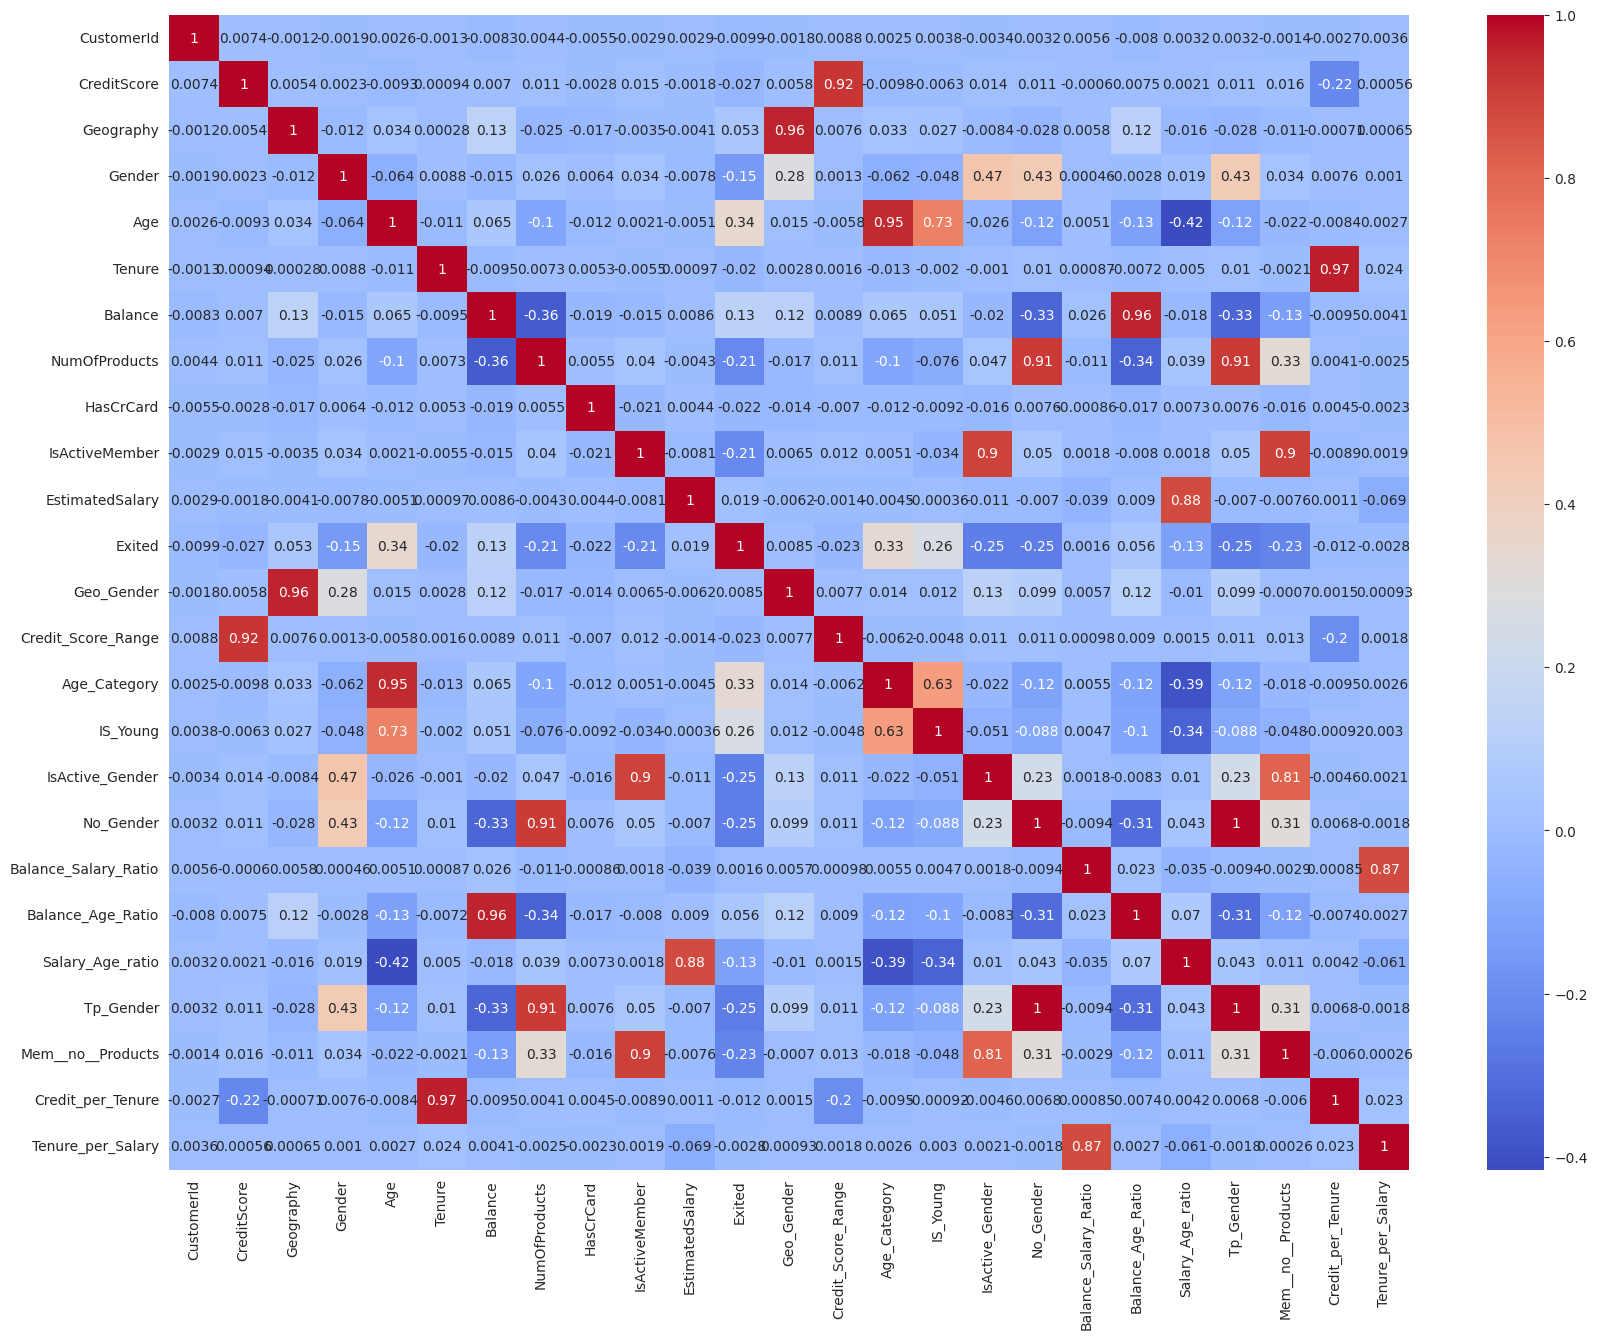

In [ ]:
plt.figure(figsize=(20, 15)) # Adjust figsize here
sns.heatmap(bank_train_df.drop('Surname',axis=1).corr(), annot=True, cmap='coolwarm')
plt.show()


In [ ]:
bank_df = age_tr(bank_df)
bank_df = is_young(bank_df)
bank_df = gen_active_tr(bank_df)
bank_df = age_sal_tr(bank_df)
bank_df = age_acc_tr(bank_df)
bank_df = tp_gender_tr(bank_df)
bank_df = meme(bank_df)

test_data = age_tr(test_data)
test_data = is_young(test_data)
test_data = gen_active_tr(test_data)
test_data = age_sal_tr(test_data)
test_data = age_acc_tr(test_data)
test_data = tp_gender_tr(test_data)
test_data = meme(test_data)

In [ ]:
bank_df =  bank_df.drop(columns=['CreditScoreStatues','AgeGroup','BalanceStatus'],axis = 1)

In [ ]:
bank_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165034 entries, 0 to 165033
Data columns (total 20 columns):
 #   Column             Non-Null Count   Dtype   
---  ------             --------------   -----   
 0   CustomerId         165034 non-null  int64   
 1   Surname            165034 non-null  object  
 2   CreditScore        165034 non-null  int64   
 3   Geography          165034 non-null  object  
 4   Gender             165034 non-null  object  
 5   Age                165034 non-null  int64   
 6   Tenure             165034 non-null  int64   
 7   Balance            165034 non-null  float64 
 8   NumOfProducts      165034 non-null  int64   
 9   HasCrCard          165034 non-null  int64   
 10  IsActiveMember     165034 non-null  int64   
 11  EstimatedSalary    165034 non-null  float64 
 12  Exited             165034 non-null  int64   
 13  Age_Category       165034 non-null  category
 14  IS_Young           165034 non-null  category
 15  IsActive_Gender    165034 non-null

In [ ]:
bank_df.drop('Surname',axis=1,inplace=True)

#Data Preprocessing

In [ ]:
X = bank_df.drop('Exited', axis=1)
y = bank_df['Exited']

# getting list of the numerical and categorical columns
num = X.select_dtypes(include=['int64', 'float64']).columns
col = X.select_dtypes(include=['object']).columns

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Preprocessing for numerical data: imputation and scaling
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', MinMaxScaler())])

# Preprocessing for categorical data: imputation and one-hot encoding
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, num),
        ('cat', categorical_transformer, col)])

#Model

##Random Forest

In [ ]:
best_model = RandomForestClassifier(**{'n_estimators': 425, 'max_depth': 13, 'min_samples_split': 41, 'min_samples_leaf': 2,
                                      'max_features': 'sqrt', 'bootstrap': False, 'criterion': 'entropy', 'random_state': 42})
Ran_best = Pipeline(steps=[('preprocessor', preprocessor), ('model', best_model)])

Ran_best.fit(X_train, y_train)
predictions = Ran_best.predict_proba(X_test)[:, 1]
auc_roc = roc_auc_score(y_test, predictions)

auc_roc

np.float64(0.8872647670428098)

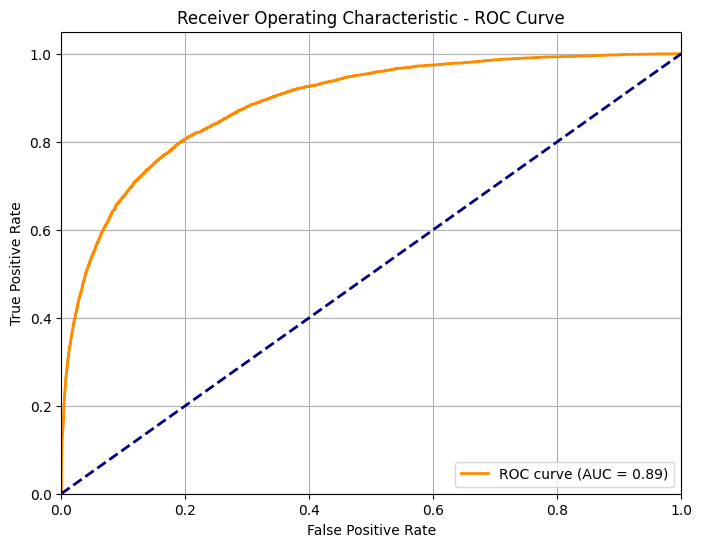

In [ ]:
# Get the false positive rate, true positive rate
fpr, tpr, thresholds = roc_curve(y_test, predictions)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {auc_roc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic - ROC Curve')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

##LightGBM

In [ ]:
best_model = LGBMClassifier(**{'n_estimators': 960, 'learning_rate': 0.031725771326186744, 'max_depth': 8, 'min_child_samples': 8,
                               'subsample': 0.7458307885861184, 'colsample_bytree': 0.5111460378911089, 'random_state': 42})
lgb_best = Pipeline(steps=[('preprocessor', preprocessor), ('model', best_model)])

lgb_best.fit(X_train, y_train)
predictions = lgb_best.predict_proba(X_test)[:, 1]
auc_roc = roc_auc_score(y_test, predictions)

auc_roc

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 27966, number of negative: 104061
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.041621 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1640
[LightGBM] [Info] Number of data points in the train set: 132027, number of used features: 29
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.211820 -> initscore=-1.313988
[LightGBM] [Info] Start training from score -1.313988


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


np.float64(0.8914441122731588)

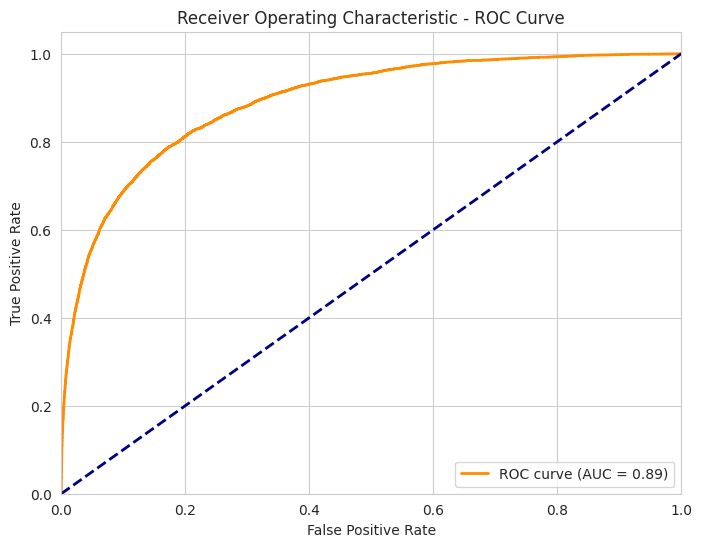

In [ ]:
# Get the false positive rate, true positive rate
fpr, tpr, thresholds = roc_curve(y_test, predictions)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {auc_roc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic - ROC Curve')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

# Conclusion

**Summary of Findings**
- **Age**: Customers aged 50–59 have the highest churn rate (~60%), and the 40–49 group contributes 43% of churners.
- **NumOfProducts**: Customers with 1 product (34.7% churn rate) make up 76.9% of churners.
- **Geography**: Germany has a 37% churn rate, contributing 37.5% of churners; France contributes 44% due to its size.
- **Gender**: Females account for 57.5% of churners.
- **Balance**: High-balance customers drive 43% of churn; zero-balance customers have a low 16% churn rate.
- **IsActiveMember**: Inactive customers churn at 29.7%.

**Model Performance**
- **Random Forest**: Achieved a high ROC-AUC, demonstrating strong predictive power.
- **LightGBM**: Similarly excellent ROC-AUC, effective for complex data.
- I used ROC-AUC due to high Imbalance in data